In [1]:
from numpy.random import default_rng as random_number_generator
from tp.schelling import mercado_inmobiliario
from tp.util import simulador, cargar_barrios, mostrar_barrios
import numpy as np

def criterio_equilibrio(serie: np.ndarray[float], lag: int, tol: float) -> bool:
    """
    Define cuando una serie temporal se encuentra en equilibrio
    """
    
    L = len(serie)
    if L <= lag:
        return False
    
    for i in range(L-1-lag , L-1):
        if np.abs((serie[i] - serie[i-1])/serie[i-1]) >= tol:
            return False
        
    return True

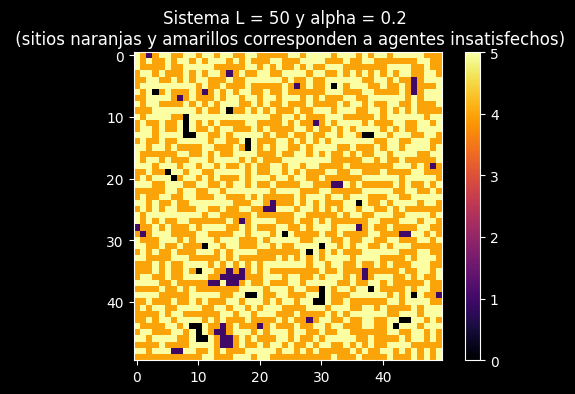

/home/joan.new/remote/personal/msscae-tp/src/tp/schelling.py:16: RuntimeWarning: invalid value encountered in scalar power
  return (K**(alpha)) * precio**(1-alpha) # Ecuación 2.5 -  p.85


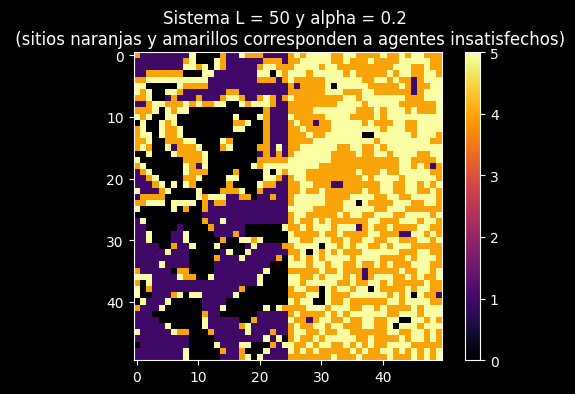

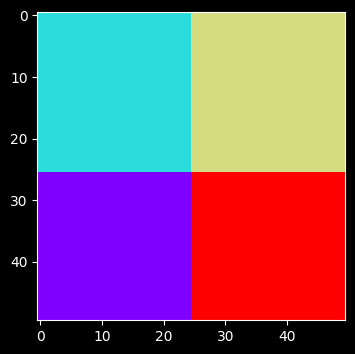

In [2]:
mapa_barrios = cargar_barrios('./tp/mapas/mapa.txt')

escala = 0.015
costo_mudanza_por_barrio = [
    escala * 200,
    escala * 150,
    escala * 80,
    escala * 10
]

precios_prop = np.array(costo_mudanza_por_barrio) / max(costo_mudanza_por_barrio) * 1.35

rng = random_number_generator(seed=1)
modelo = mercado_inmobiliario(
    L=50, 
    alpha=.2, 
    rng=rng, 
    configuracion_barrios=mapa_barrios, 
    precios_barrios=costo_mudanza_por_barrio,
    precios_prop_barrios=precios_prop,
    rango_de_vision=0.7
)

sim = simulador(modelo, criterio_equilibrio, max_steps=50, lag=20, tol=1E-3)
modelo.lattice_plot()
sim.run()
modelo.lattice_plot()
mostrar_barrios(modelo.mapa_barrios);